# Global database on school-age digital connectivity

# Task 1: Data Preparation


In [ ]:
pip install pandas
pip install numpy
pip install matplotlib
pip install seaborn
pip install plotly

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt


In [2]:
files=['Primary.csv','Secondary.csv','Total.csv']

def load(file):
    df = pd.read_csv(file)
    # Set column names to values in second row
    df.columns = df.iloc[0]
    # Delete the second row
    df.drop(df.index[0], inplace=True)
    # Reset the index
    df.reset_index(drop=True, inplace=True)
    return df

def clean(df, filename):
    # Drop unwanted columns
    df.drop(['ISO3', 'Data source'], axis=1, inplace=True)
    
    # Drop rows with null values
    df.dropna(inplace=True)
    
    # Convert the specified columns to integers
    num_cols = ['Total', 'Rural (Residence)', 'Urban (Residence)', 'Poorest (Wealth quintile)', 'Richest (Wealth quintile)']
    df[num_cols] = df[num_cols].apply(lambda x: x.str.replace('%', '').astype(int))
    
    # Remove '-' and anything after that from the 'Time period'
    df['Time period'] = df['Time period'].str.split('-', expand=True)[0]
    
    
    df.to_csv(f"cleaned_{filename}", index=False)
    return df

for file in files:
    df = load(file)
    df = clean(df, file)


# Task 2: Data Exploration

## Task 2.1 
#### From the dataset about primary school, choose 1 column with nominal values, 1 column with ordinal Values, and 1 column with numerical values. Then, create a visualization for each of them.

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


##### Nominal

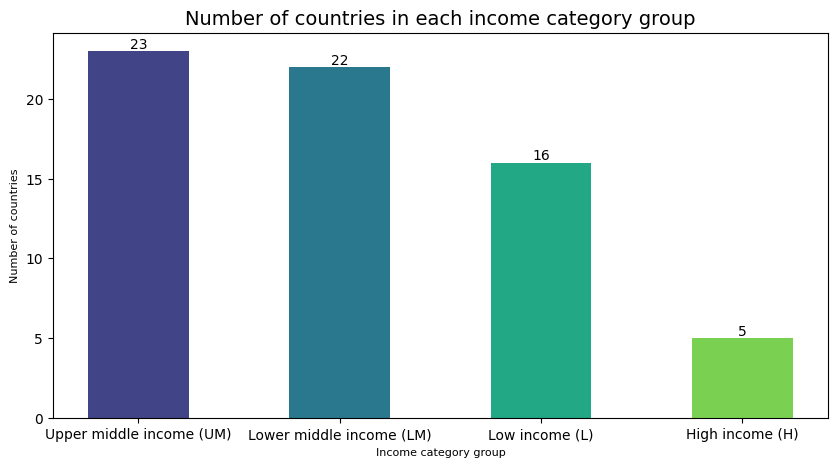

In [4]:
df = pd.read_csv('cleaned_Primary.csv')
df = df[["Countries and areas", "Income Group"]]

# Count number of countries in each income category group
counts = df["Income Group"].value_counts()

# Set color gradient for each income category group
colors = sns.color_palette("viridis", len(counts))

# Create bar chart to visualize counts
plt.figure(figsize=(10, 5))
bars = plt.bar(counts.index, counts.values, width=0.5, linewidth=1, color=colors)
plt.xlabel("Income category group", fontsize=8)
plt.ylabel("Number of countries", fontsize=8)
plt.title("Number of countries in each income category group", fontsize=14)

# Set font size of data labels
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(bar.get_height()), ha='center', va='bottom', fontsize=10)

plt.show()

##### Ordinal

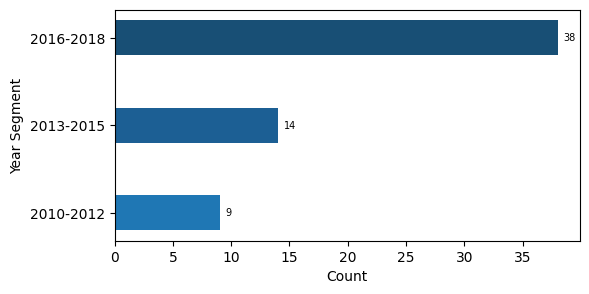

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load data and create year segment column
df = pd.read_csv('cleaned_Primary.csv')
df['Year Segment'] = pd.cut(df['Time period'], bins=range(2010, 2023, 3), labels=['2010-2012', '2013-2015', '2016-2018', '2019-2021'])

# Get the count of countries and areas for each year segment
count_df = df.groupby('Year Segment')['Countries and areas'].count().reset_index(name='count')

# Omit bars with no values
count_df = count_df[count_df['count'] > 0]

# Create a list of dark blue colors for the bars
colors = ['#1f77b4', '#1c5f94', '#184f75', '#144057']

# Create a horizontal bar chart with dark colors
fig, ax = plt.subplots(figsize=(6, 3))
bars = ax.barh(count_df['Year Segment'], count_df['count'], color=colors, height=0.4)

# Show values on the bars
for bar in bars:
    width = bar.get_width()
    label_x = bar.get_x() + bar.get_width() + 0.5
    label_y = bar.get_y() + bar.get_height() / 2
    ax.text(label_x, label_y, str(int(width)), va='center', color='black',fontsize=7)

# Set the x and y labels
ax.set_xlabel('Count')
ax.set_ylabel('Year Segment')

# Show the plot
plt.show()


##### Numerical

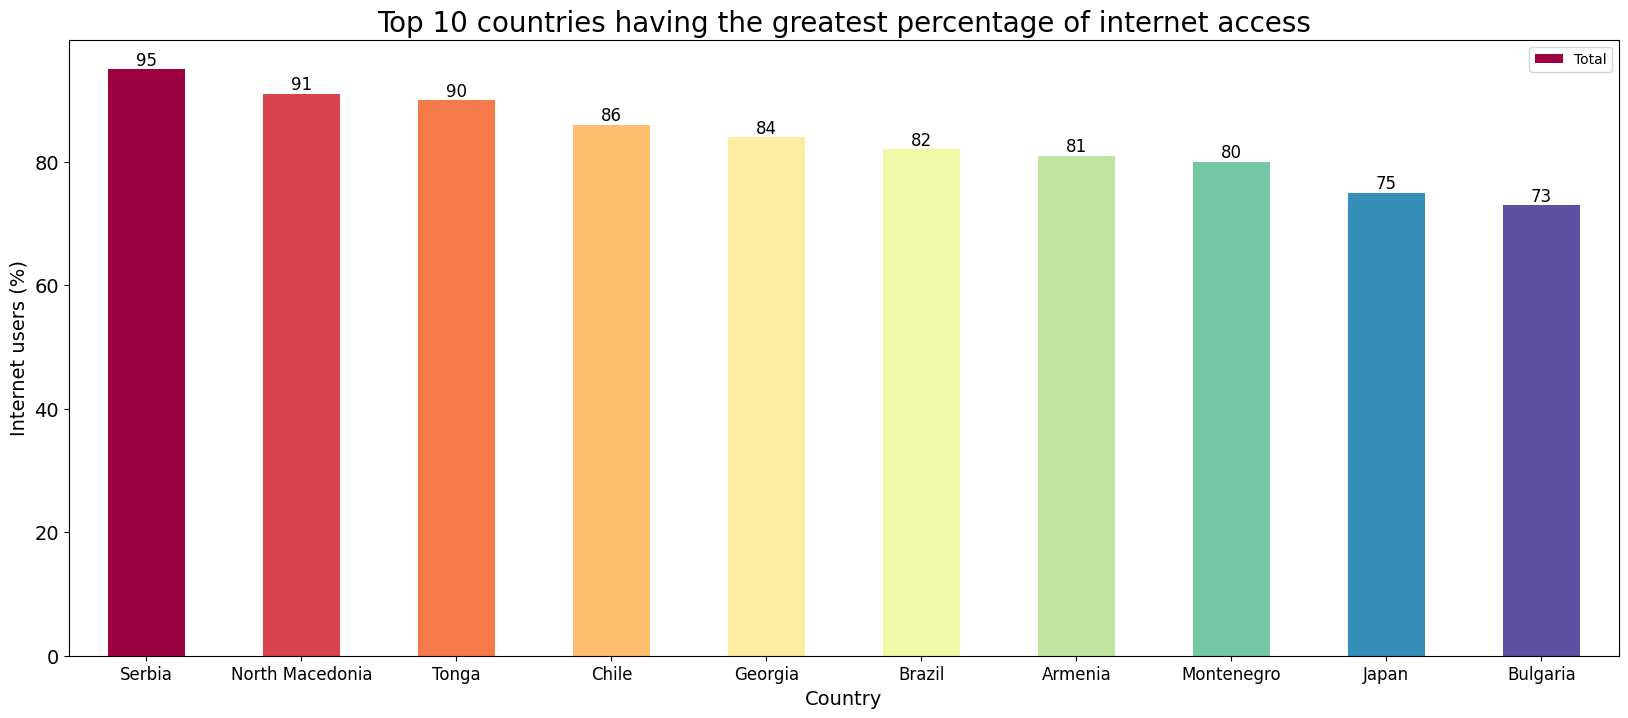

In [6]:
# Load the cleaned data
df = pd.read_csv('cleaned_Primary.csv')

# Sort the dataframe by 'Total' column in descending order and get the top 10 rows
df = df.sort_values(by='Total', ascending=False).head(10)

# Create the bar chart
ax = df.plot(x='Countries and areas', y='Total', kind='bar', figsize=(20,8), fontsize=14, color=plt.cm.Spectral(np.linspace(0, 1, len(df))))

# Set the x and y labels
ax.set_xlabel('Country', fontsize = 14)
ax.set_ylabel('Internet users (%)', fontsize = 14)
ax.set_title('Top 10 countries having the greatest percentage of internet access', fontsize = 20)

# Rotate the x-axis labels and make them smaller
plt.xticks(rotation=0, fontsize=12)

# Add the values of the bars
for i in ax.containers:
    ax.bar_label(i, fontsize=12)

# Show the plot
plt.show()

## Task 2.2 

* Explore the data about all children in a school attendance age,
* Analyze the top 10 'Countries and areas' with the highest total % of school-age children (who have an internet connection at home) in terms of their Income Group and Residence (Rural or Urban)

##### Income Group

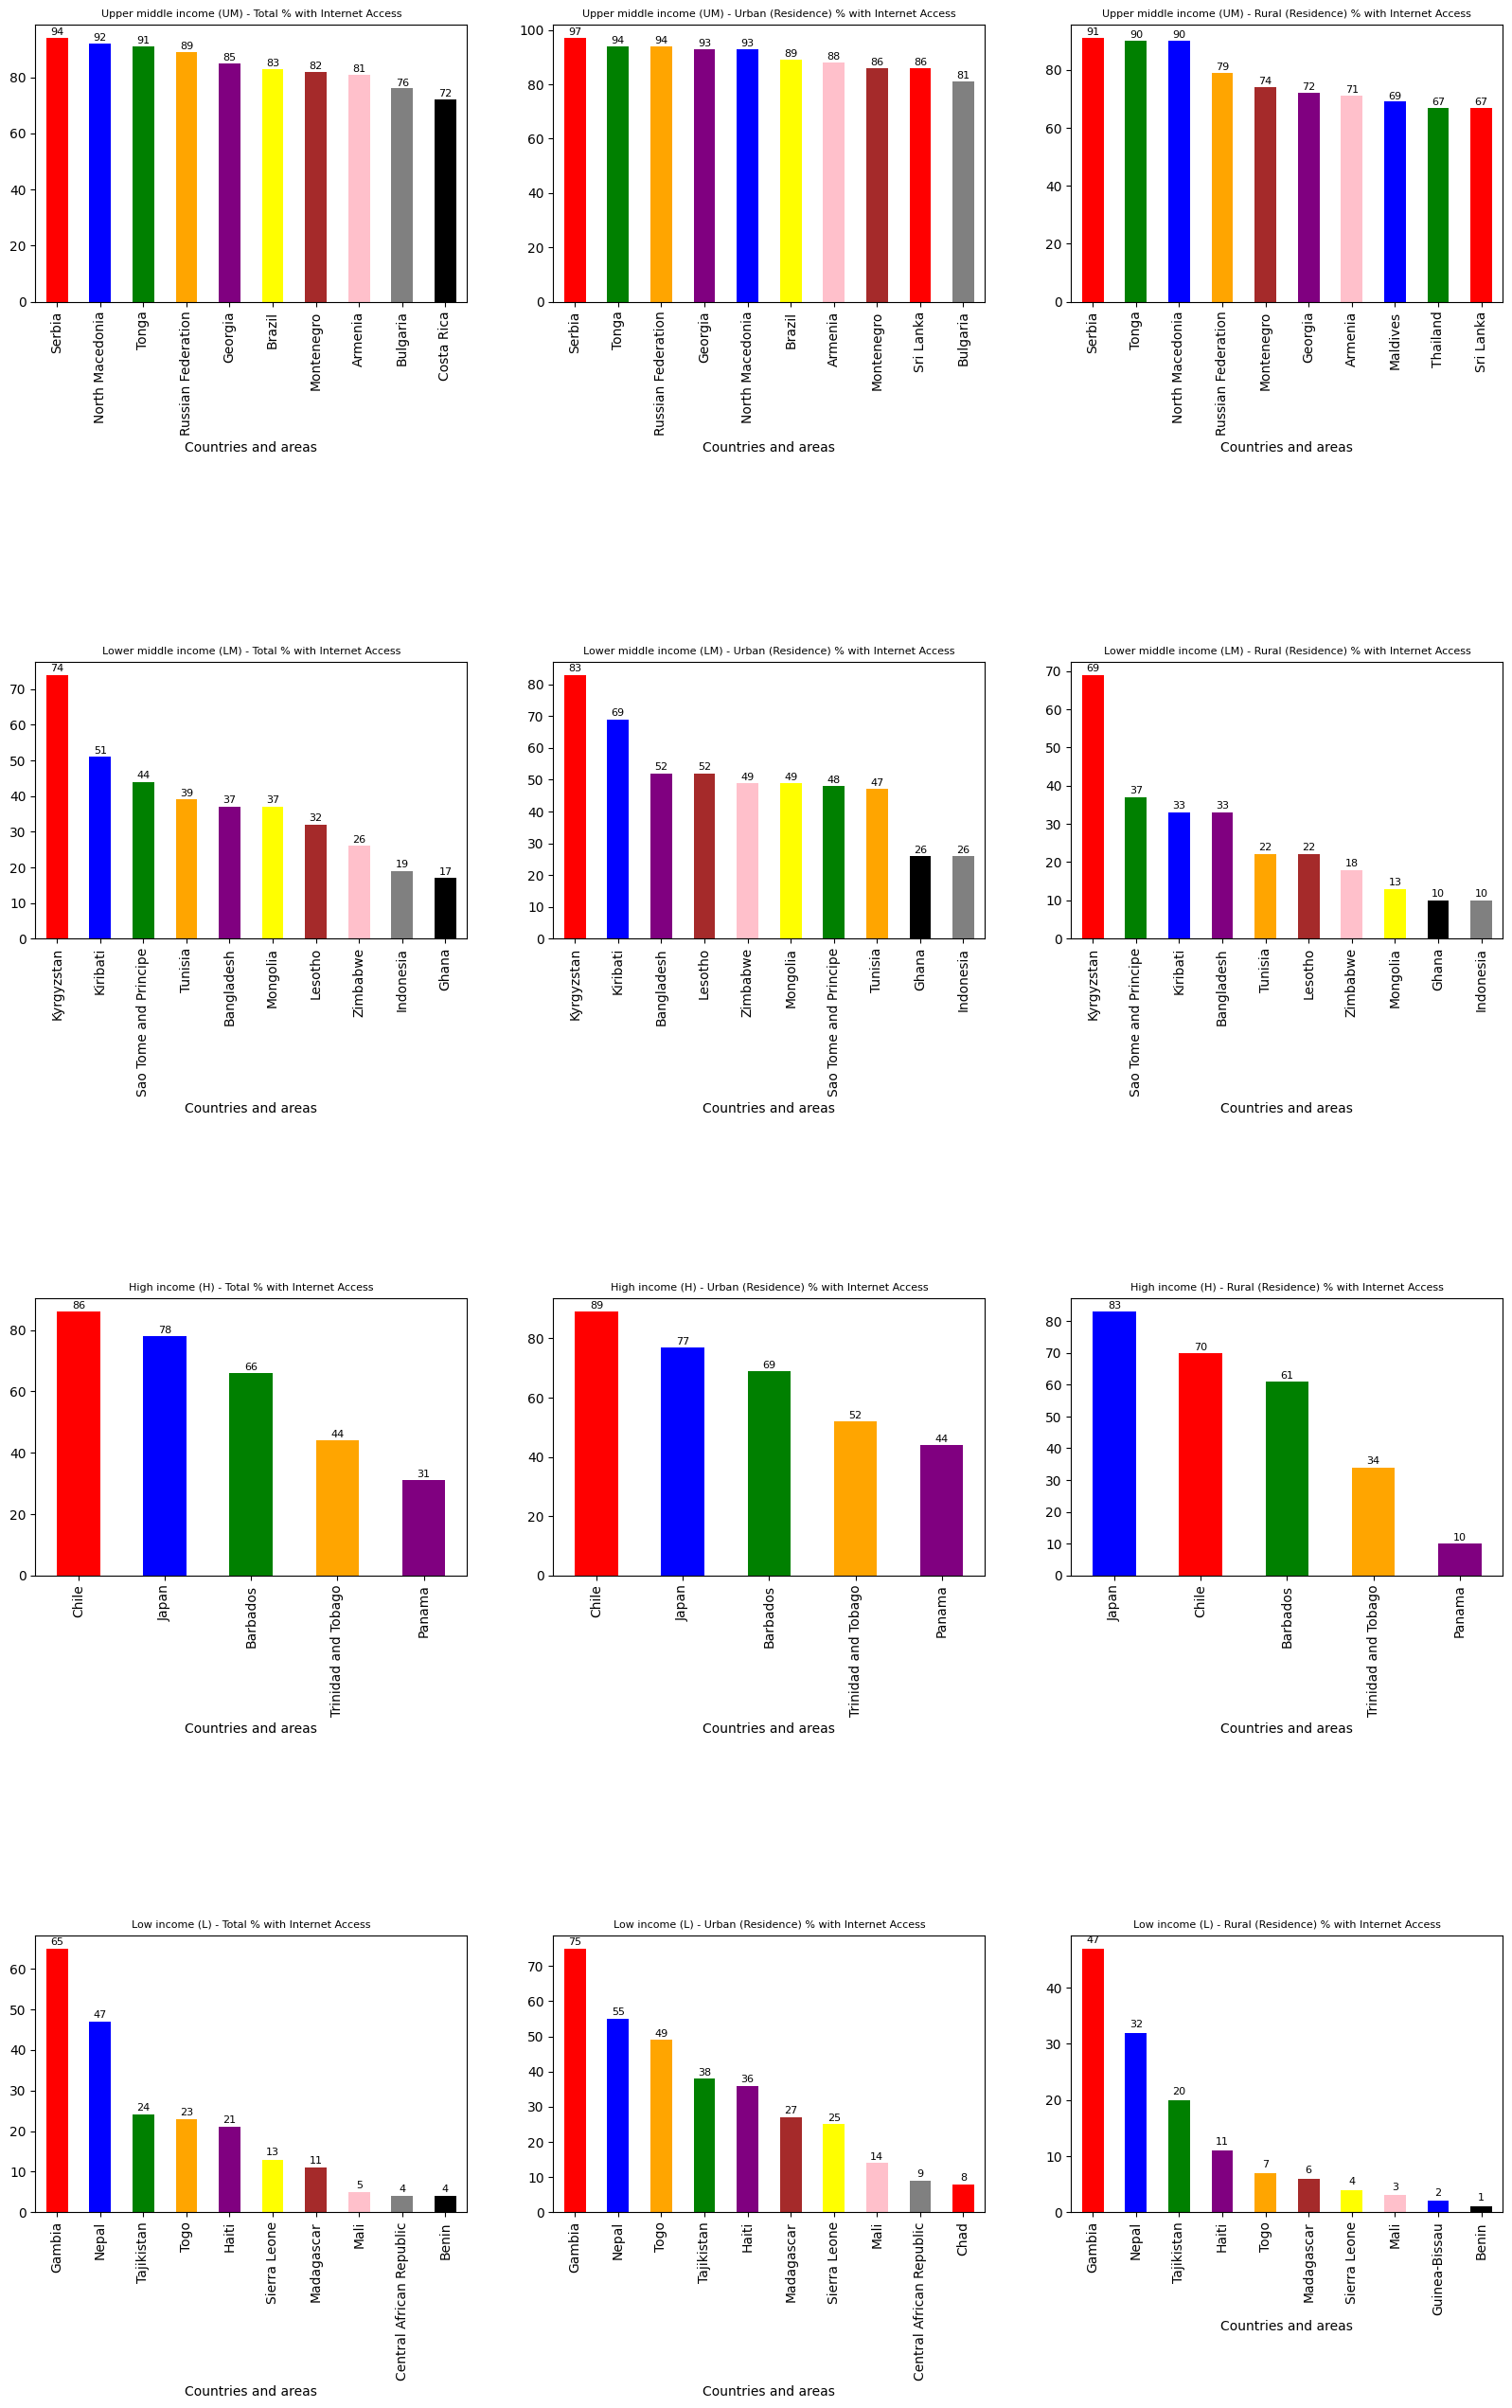

In [7]:
df = pd.read_csv('cleaned_Total.csv')

a, b = 4, 3
fig, axs = plt.subplots(a, b, figsize=(20, 30))
fig.subplots_adjust(hspace=1.3)
axs = axs.flatten()
ax_idx = 0

income_groups = df['Income Group'].unique()
num_groups = len(income_groups)

i = 0
while ax_idx < len(axs) and i < num_groups:
    country_colors = {}
    colors = ['red', 'blue', 'green', 'orange', 'purple', 'yellow', 'brown', 'pink', 'gray', 'black']
    income_group_df = df[df['Income Group'] == income_groups[i]]
    sorted_df = income_group_df.sort_values(by=['Total', 'Urban (Residence)', 'Rural (Residence)'], ascending=False)
    top_10_df = sorted_df.head(10)
    for country in top_10_df['Countries and areas']:
        if country not in country_colors:
            country_colors[country] = colors[len(country_colors) % len(colors)]
    ax = top_10_df.plot(x='Countries and areas', y='Total', kind='bar', color=[country_colors[c] for c in top_10_df['Countries and areas']], ax=axs[ax_idx])
    ax.set_title(income_groups[i] + ' - Total % with Internet Access', fontsize=8)
    if ax.get_legend():
        ax.get_legend().remove()
    ax_idx += 1

    for j, v in enumerate(top_10_df['Total']):
        ax.text(j, v + 1, str(v), ha='center', fontsize=8)

    sorted_df = income_group_df.sort_values(by=['Urban (Residence)'], ascending=False)
    top_10_df = sorted_df.head(10)
    for country in top_10_df['Countries and areas']:
        if country not in country_colors:
            country_colors[country] = colors[len(country_colors) % len(colors)]
    ax = top_10_df.plot(x='Countries and areas', y='Urban (Residence)', kind='bar', color=[country_colors[c] for c in top_10_df['Countries and areas']], ax=axs[ax_idx])
    ax.set_title(income_groups[i] + ' - Urban (Residence) % with Internet Access',fontsize=8)
    if ax.get_legend():
        ax.get_legend().remove()
    ax_idx += 1

    for j, v in enumerate(top_10_df['Urban (Residence)']):
        ax.text(j, v + 1, str(v), ha='center', fontsize=8)

    sorted_df = income_group_df.sort_values(by=['Rural (Residence)'], ascending=False)
    top_10_df = sorted_df.head(10)
    for country in top_10_df['Countries and areas']:
        if country not in country_colors:
            country_colors[country] = colors[len(country_colors) % len(colors)]
    ax = top_10_df.plot(x='Countries and areas', y='Rural (Residence)', kind='bar', color=[country_colors[c] for c in top_10_df['Countries and areas']], ax=axs[ax_idx])
    ax.set_title(income_groups[i] + ' - Rural (Residence) % with Internet Access', fontsize=8)
    if ax.get_legend():
        ax.get_legend().remove()

    ax_idx += 1

    for j, v in enumerate(top_10_df['Rural (Residence)']):
        ax.text(j, v + 1, str(v), ha='center', fontsize=8)

    i += 1

plt.show()


## Task 2.3 

#### Thoroughly compare the percentage of Primary children and Secondary Children that are from a Lower middle income (LM) group with Internet connection at home.

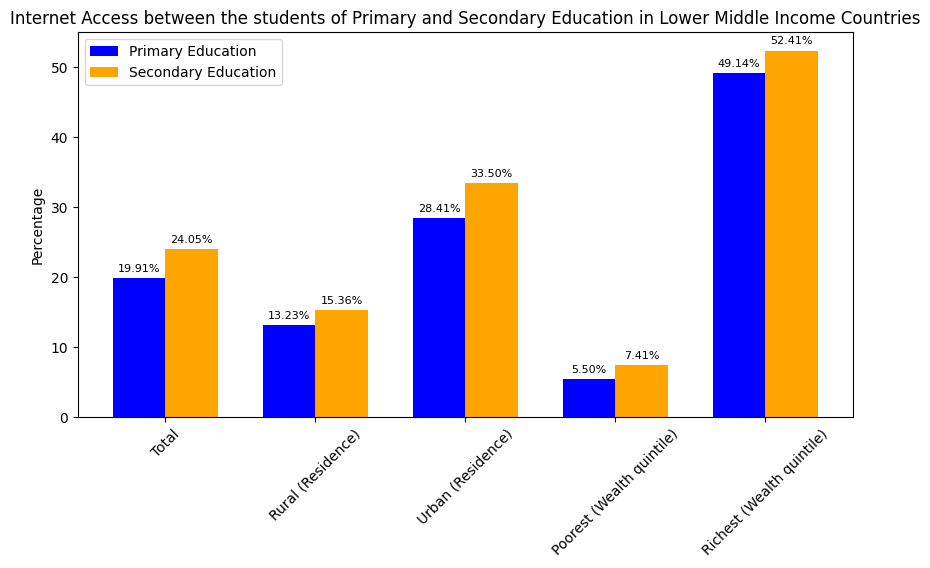

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read data from CSV files into data frames
primary_df = pd.read_csv('cleaned_Primary.csv')
secondary_df = pd.read_csv('cleaned_Secondary.csv')

# Filter data frames to only include 'Lower middle income (LM)' values in 'Income Group' column
primary_df = primary_df[primary_df['Income Group'] == 'Lower middle income (LM)']
secondary_df = secondary_df[secondary_df['Income Group'] == 'Lower middle income (LM)']

# Select required columns and take the mean
columns = ['Total', 'Rural (Residence)', 'Urban (Residence)', 'Poorest (Wealth quintile)','Richest (Wealth quintile)']
primary_data = primary_df[columns].mean().tolist()
secondary_data = secondary_df[columns].mean().tolist()

# Set up the data for the clustered column chart
n = len(columns)
width = 0.35
x = np.arange(n)

# Create the figure and subplot
fig, ax = plt.subplots(figsize=(10, 5))

# Add the clustered columns to the subplot
rects1 = ax.bar(x - width/2, primary_data, width, color='blue', label='Primary Education')
rects2 = ax.bar(x + width/2, secondary_data, width, color='orange', label='Secondary Education')

# Show the values on top of the bars
for rect in rects1+rects2:
    height = rect.get_height()
    ax.annotate(f'{height:.2f}%', xy=(rect.get_x() + rect.get_width() / 2, height), xytext=(0, 3),
                textcoords="offset points", ha='center', va='bottom', fontsize=8)

# Set the axis labels and title
ax.set_ylabel('Percentage')
ax.set_title('Internet Access between the students of Primary and Secondary Education in Lower Middle Income Countries')

# Set the x-axis ticks and labels
ax.set_xticks(x)
ax.set_xticklabels(columns, rotation=45)

# Add a legend
ax.legend()

# Show the plot
plt.show()
